In [1]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

class Args():
    def __init__(self):
        self.batch_size = 64
        self.test_batch_size = 1000
        self.epochs = 10
        self.lr = 0.01
        self.momentum = 0.5
        self.no_cuda = False
        self.seed = 1488
        self.log_interval = 100
        self.cuda = not self.no_cuda and torch.cuda.is_available()
# Training settings

args = Args()

torch.manual_seed(args.seed)
if args.cuda:
    torch.cuda.manual_seed(args.seed)


kwargs = {'num_workers': 1, 'pin_memory': True} if args.cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args.batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args.test_batch_size, shuffle=True, **kwargs)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = Net()
if args.cuda:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if args.cuda:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        if args.cuda:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


Processing...
Done!


In [2]:
for epoch in range(1, args.epochs + 1):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.334956
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.279837
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.321665
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.259933
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.206614
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.207306
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.218209
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.081697
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.122104
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.909746
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.958155
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.698730
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.583701
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.494573
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.496905
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.622803
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.164994
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.425603
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.191603
Train Epoch: 1 [12160/60000 (20%)]	Loss: 1.106961
Train Epoch: 1 [12800/60000 (

Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.275821
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.248764
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.257583
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.377242
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.354619
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.188191
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.392836
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.309683
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.227698
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.179212
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.208373
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.336376
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.266744
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.148222
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.543352
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.367009
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.361285
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.345057
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.483840
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.258400


Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.222773
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.396372
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.353940
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.182024
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.238024
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.103312
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.300827
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.256458
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.110662
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.183844
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.259335
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.167337
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.245731
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.183977
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.089659
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.256652
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.154654
Train Epoch: 4 [40960/60000 (68%)]	Loss: 0.127624
Train Epoch: 4 [41600/60000 (69%)]	Loss: 0.296386
Train Epoch: 4 [42240/60000 (70%)]	Loss: 0.320253


Train Epoch: 6 [14080/60000 (23%)]	Loss: 0.342681
Train Epoch: 6 [14720/60000 (25%)]	Loss: 0.152660
Train Epoch: 6 [15360/60000 (26%)]	Loss: 0.227162
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.134966
Train Epoch: 6 [16640/60000 (28%)]	Loss: 0.151116
Train Epoch: 6 [17280/60000 (29%)]	Loss: 0.172859
Train Epoch: 6 [17920/60000 (30%)]	Loss: 0.306472
Train Epoch: 6 [18560/60000 (31%)]	Loss: 0.142954
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.227133
Train Epoch: 6 [19840/60000 (33%)]	Loss: 0.350169
Train Epoch: 6 [20480/60000 (34%)]	Loss: 0.234490
Train Epoch: 6 [21120/60000 (35%)]	Loss: 0.233887
Train Epoch: 6 [21760/60000 (36%)]	Loss: 0.198962
Train Epoch: 6 [22400/60000 (37%)]	Loss: 0.176388
Train Epoch: 6 [23040/60000 (38%)]	Loss: 0.210058
Train Epoch: 6 [23680/60000 (39%)]	Loss: 0.286452
Train Epoch: 6 [24320/60000 (41%)]	Loss: 0.125689
Train Epoch: 6 [24960/60000 (42%)]	Loss: 0.234615
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.286361
Train Epoch: 6 [26240/60000 (44%)]	Loss: 0.201167


Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.263789

Test set: Average loss: 0.0598, Accuracy: 9816/10000 (98%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.248969
Train Epoch: 8 [640/60000 (1%)]	Loss: 0.219529
Train Epoch: 8 [1280/60000 (2%)]	Loss: 0.129918
Train Epoch: 8 [1920/60000 (3%)]	Loss: 0.170736
Train Epoch: 8 [2560/60000 (4%)]	Loss: 0.193886
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.176317
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.274476
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.289089
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.091758
Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.342295
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.081780
Train Epoch: 8 [7040/60000 (12%)]	Loss: 0.134545
Train Epoch: 8 [7680/60000 (13%)]	Loss: 0.187120
Train Epoch: 8 [8320/60000 (14%)]	Loss: 0.124972
Train Epoch: 8 [8960/60000 (15%)]	Loss: 0.042108
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.246576
Train Epoch: 8 [10240/60000 (17%)]	Loss: 0.149693
Train Epoch: 8 [10880/60000 (18%)]	Loss: 0.105441
Train Epoch: 8 [11

Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.199118
Train Epoch: 9 [45440/60000 (76%)]	Loss: 0.265163
Train Epoch: 9 [46080/60000 (77%)]	Loss: 0.143005
Train Epoch: 9 [46720/60000 (78%)]	Loss: 0.128932
Train Epoch: 9 [47360/60000 (79%)]	Loss: 0.157726
Train Epoch: 9 [48000/60000 (80%)]	Loss: 0.123010
Train Epoch: 9 [48640/60000 (81%)]	Loss: 0.254458
Train Epoch: 9 [49280/60000 (82%)]	Loss: 0.043627
Train Epoch: 9 [49920/60000 (83%)]	Loss: 0.069677
Train Epoch: 9 [50560/60000 (84%)]	Loss: 0.083338
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.196682
Train Epoch: 9 [51840/60000 (86%)]	Loss: 0.082031
Train Epoch: 9 [52480/60000 (87%)]	Loss: 0.167850
Train Epoch: 9 [53120/60000 (88%)]	Loss: 0.177744
Train Epoch: 9 [53760/60000 (90%)]	Loss: 0.195922
Train Epoch: 9 [54400/60000 (91%)]	Loss: 0.164164
Train Epoch: 9 [55040/60000 (92%)]	Loss: 0.166349
Train Epoch: 9 [55680/60000 (93%)]	Loss: 0.232654
Train Epoch: 9 [56320/60000 (94%)]	Loss: 0.075392
Train Epoch: 9 [56960/60000 (95%)]	Loss: 0.155938


In [4]:
model

Net(
  (conv1): Conv2d (1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=320, out_features=50)
  (fc2): Linear(in_features=50, out_features=10)
)

In [7]:
class Net_restricted(nn.Module):
    def __init__(self):
        super(Net_restricted, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        return x

In [8]:
model_restricted = Net_restricted()

In [12]:
dict_restricted = model.state_dict()
dict_restricted.pop('fc2.weight')
dict_restricted.pop('fc2.bias')
dict_restricted.keys()

odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc1.weight', 'fc1.bias'])

In [13]:
model_restricted.load_state_dict(dict_restricted)

In [14]:
model_restricted

Net_restricted(
  (conv1): Conv2d (1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=320, out_features=50)
)

In [30]:
train_X = []
train_y = []
test_X = []
test_y = []

model_restricted.eval().cuda()

for data, target in train_loader:
    if args.cuda:
        data, target = data.cuda(), target.cuda()
    data, target = Variable(data, volatile=True), Variable(target)
    output = model_restricted(data)
    train_X.append(output)
    train_y.append(target)
    
for data, target in test_loader:
    if args.cuda:
        data, target = data.cuda(), target.cuda()
    data, target = Variable(data, volatile=True), Variable(target)
    output = model_restricted(data)
    test_X.append(output)
    test_y.append(target)


In [31]:
train_X_tensor = torch.cat(train_X)
test_X_tensor = torch.cat(test_X)
train_y_tensor = torch.cat(train_y)
test_y_tensor = torch.cat(test_y)

In [38]:
test_X_tensor.size()

torch.Size([10000, 50])

In [34]:
from sklearn import manifold

In [35]:
TSNE = manifold.TSNE()

In [43]:
X2d = TSNE.fit_transform(test_X_tensor.cpu().data.numpy()[:1000])

In [44]:
from matplotlib import pyplot as plt

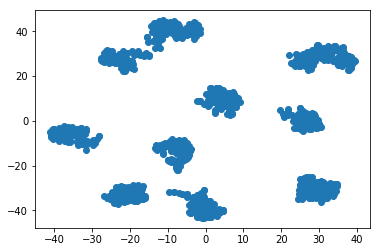

In [45]:
plt.figure()
plt.scatter(X2d[:,0], X2d[:,1])
plt.show()

In [48]:
torch.save(train_X_tensor.cpu().data, 'train_X.pth')
torch.save(train_y_tensor.cpu().data, 'train_y.pth')
torch.save(test_X_tensor.cpu().data, 'test_X.pth')
torch.save(test_y_tensor.cpu().data, 'test_y.pth')

In [49]:
torch.save(model.state_dict(), 'LeNet.pth')

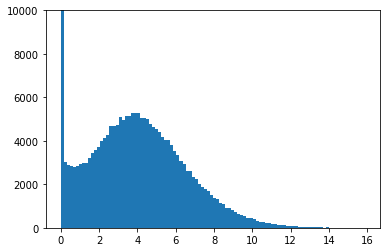

In [54]:
plt.figure()
plt.hist(test_X_tensor.cpu().data.numpy().reshape(-1), bins=100)
plt.ylim(0,10000)
plt.show()